In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk

from patsy import dmatrix

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

C:\Users\LG\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv("train_trans.csv", parse_dates=["pickup_datetime", "dropoff_datetime"])
test = pd.read_csv("test_trans.csv", parse_dates=["pickup_datetime"])

In [3]:
train.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_weekday,pickup_hour,working_day,distance,bearing,avg_speed_km_h
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,4,13,1,1.225080,240.940662,5.668751
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,1,6,7,0,6.049836,25.342196,33.251005
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,4,4,6,1,7.824606,209.211508,36.869870
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,1,1,15,1,1.092564,35.033294,10.544853
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198,4,1,14,1,1.134042,29.969486,20.618945


3-17. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거

In [4]:
model17 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train)
result17 = model17.fit()
print(result17.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.584
Model:                                 OLS   Adj. R-squared:                  0.584
Method:                      Least Squares   F-statistic:                 1.205e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             13:57:13   Log-Likelihood:            -1.0965e+06
No. Observations:                  1458644   AIC:                         2.193e+06
Df Residuals:                      1458626   BIC:                         2.193e+06
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

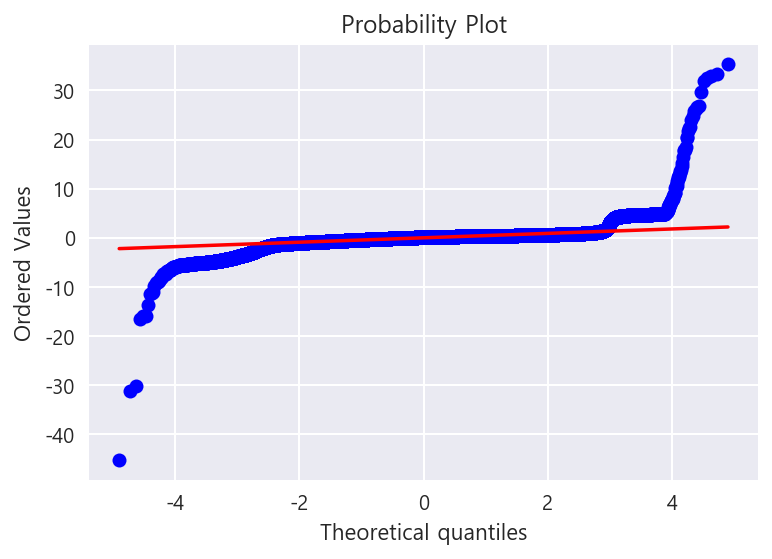

In [5]:
sp.stats.probplot(result17.resid, plot=plt)
plt.show()

3-21. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거 & pickup_longitude 2차 다항회귀

In [6]:
model21 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train)
result21 = model21.fit()
print(result21.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.591
Model:                                 OLS   Adj. R-squared:                  0.591
Method:                      Least Squares   F-statistic:                 1.173e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             14:01:30   Log-Likelihood:            -1.0837e+06
No. Observations:                  1458644   AIC:                         2.167e+06
Df Residuals:                      1458625   BIC:                         2.168e+06
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

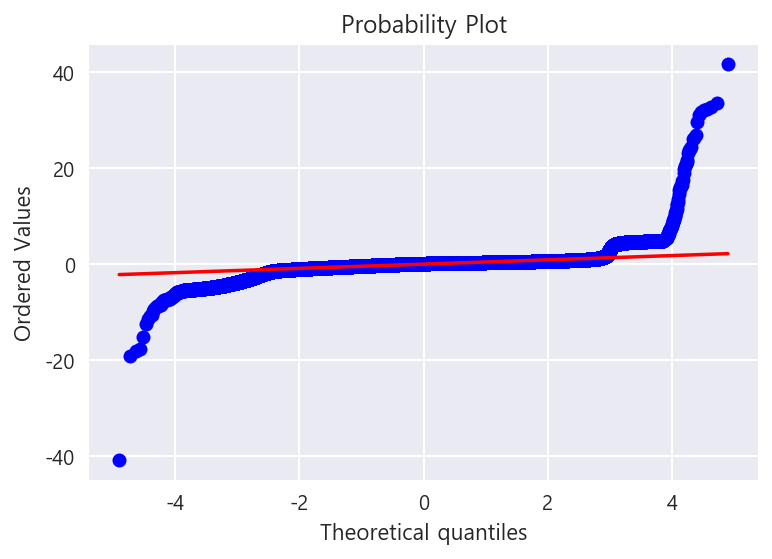

In [7]:
sp.stats.probplot(result21.resid, plot=plt)
plt.show()

In [9]:
# 레버리지 구하기
influence21 = result21.get_influence()
hat21 = influence21.hat_matrix_diag
# 레버리지의 평균 구하기(n = 1458644, n은 데이터의 개수)
hat21_mean = hat21.sum() / 1458644
# 표준화 잔차 구하기
rs_p21 = result21.resid_pearson
# 레버리지와 표준화 잔차로 이루어진 data frame 만들기(index는 train data의 index와 동일)
d21 = {"hat21" : hat21, "rs_p21" : rs_p21}
hat_rs_p_21_df = pd.DataFrame(data = d21, index = train.index.values)
# 레버리지와 표준화 잔차가 각각 일정수준 이상으로 큰 value들은 True로 나오는 data frame 만들기(index는 train data의 index와 동일)
d21_3h3r = {"hat21" : hat21 > (3 * hat21_mean), "rs_p21" : rs_p21 > 3}
hat_rs_p_out_3h3r_21_df = pd.DataFrame(data = d21_3h3r, index = train.index.values)
# 아웃라이어 data(레버리지와 표준화 잔차 둘 다 큰것. 따라서 any를 씀)의 표준화 잔차와 레버리지(index는 재정렬되지 않은 상태)
outlier21_3h3r = hat_rs_p_21_df[hat_rs_p_out_3h3r_21_df]
outlier21_3h3r.dropna(how = "any", inplace = True)
# outlier의 index 뽑기
outlier21_3h3r_index = outlier21_3h3r.index
# 뽑은 index로 train data에서 outlier 제거하기
train_out_rm_21_3h3r = train.drop(labels = outlier21_3h3r_index)
train_out_rm_21_3h3r.reset_index(drop=True, inplace=True)
# 몇개의 outlier들이 제거되었는지 print하기
print("{} outliers are omitted from the data.".format(len(outlier21_3h3r_index)))

320 outliers are omitted from the data.


3-21_2. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거 & pickup_longitude 2차 다항회귀 & 레버리지와 표준화 잔차가 모두 큰것 제거(평균의 3배이상, 3이상)

In [10]:
model21_rm = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_21_3h3r)
result21_rm = model21_rm.fit()
print(result21_rm.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.689
Model:                                 OLS   Adj. R-squared:                  0.689
Method:                      Least Squares   F-statistic:                 1.794e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             14:07:34   Log-Likelihood:            -8.8245e+05
No. Observations:                  1458324   AIC:                         1.765e+06
Df Residuals:                      1458305   BIC:                         1.765e+06
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

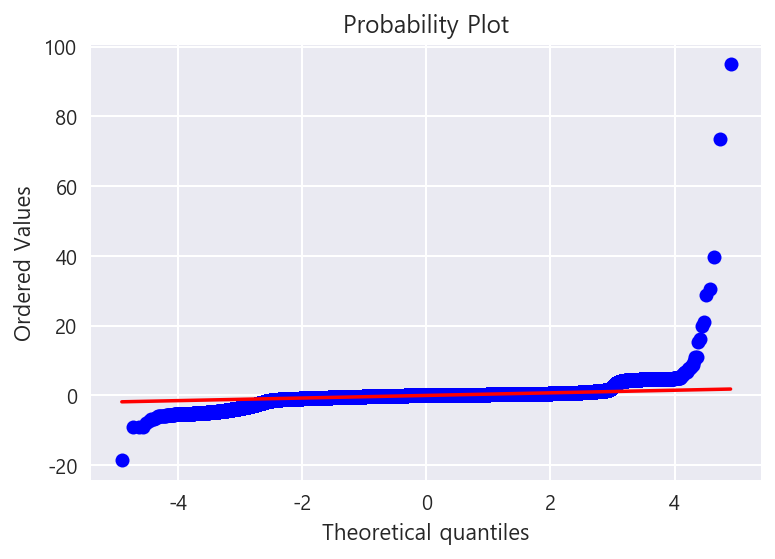

In [11]:
sp.stats.probplot(result21_rm.resid, plot=plt)
plt.show()

In [13]:
result21_rm_lasso4 = model21_rm.fit_regularized(alpha=0.001, L1_wt=1)
print(result21_rm_lasso4.params)

C(working_day)[0]                  6.444575
C(working_day)[1]                  6.473274
scale(passenger_count)             0.006440
scale(distance)                    0.833450
scale(I(distance ** 2))           -0.460831
scale(I(distance ** 3))            0.266140
scale(bearing)                    -0.034253
scale(pickup_month)                0.010730
scale(pickup_weekday)              0.008989
scale(pickup_hour)                 0.000000
scale(I(pickup_hour ** 2))         0.003039
scale(pickup_latitude)             0.065812
scale(pickup_longitude)           -0.270683
scale(I(pickup_longitude ** 2))   -0.238961
scale(dropoff_latitude)           -0.008307
scale(dropoff_longitude)          -0.024073
scale(avg_speed_km_h)             -0.605189
scale(I(avg_speed_km_h ** 2))      0.502129
scale(I(avg_speed_km_h ** 3))     -0.128616
dtype: float64


3-21_2_8. 3-21_2에서 scale(pickup_hour)제거(alpha=0.001인 Lasso결과에서 0이어서 제거)

In [14]:
model21_rm_8 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_21_3h3r)
result21_rm_8 = model21_rm_8.fit()
print(result21_rm_8.summary())    

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.689
Model:                                 OLS   Adj. R-squared:                  0.689
Method:                      Least Squares   F-statistic:                 1.900e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             14:28:26   Log-Likelihood:            -8.8246e+05
No. Observations:                  1458324   AIC:                         1.765e+06
Df Residuals:                      1458306   BIC:                         1.765e+06
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [15]:
result21_rm_lasso5 = model21_rm.fit_regularized(alpha=0.003, L1_wt=1)
print(result21_rm_lasso5.params)

C(working_day)[0]                  6.437544
C(working_day)[1]                  6.470484
scale(passenger_count)             0.004686
scale(distance)                    0.805253
scale(I(distance ** 2))           -0.245998
scale(I(distance ** 3))            0.086358
scale(bearing)                    -0.030340
scale(pickup_month)                0.009132
scale(pickup_weekday)              0.008183
scale(pickup_hour)                 0.000000
scale(I(pickup_hour ** 2))         0.000000
scale(pickup_latitude)             0.061048
scale(pickup_longitude)           -0.122528
scale(I(pickup_longitude ** 2))   -0.072376
scale(dropoff_latitude)           -0.007626
scale(dropoff_longitude)           0.000000
scale(avg_speed_km_h)             -0.591966
scale(I(avg_speed_km_h ** 2))      0.331365
scale(I(avg_speed_km_h ** 3))      0.000000
dtype: float64


In [16]:
train_pll_big = train.loc[(train["pickup_latitude"]>45) | (train["pickup_longitude"]<-100)]
train_dll_big = train.loc[(train["dropoff_latitude"]<36) | (train["dropoff_longitude"]<-120)]

In [19]:
train_pll_big.index

Int64Index([184925, 1068810, 1184454], dtype='int64')

In [21]:
train_dll_big.index

Int64Index([275644, 775976, 782256, 1068810, 1184454], dtype='int64')

In [23]:
train_pll_big.index.intersection(train_dll_big.index)

Int64Index([1068810, 1184454], dtype='int64')

In [24]:
train_big_loc_idx = train_pll_big.index.union(train_dll_big.index)

In [25]:
train_big_loc_rm = train.drop(labels = train_big_loc_idx)

In [26]:
train_big_loc_dur_rm = train_big_loc_rm[train_big_loc_rm["trip_duration"]<80000]

3-23_big_loc_dur_rm. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거 & pickup_longitude 2차 다항회귀 & pickup이랑 dropoff 좌표 중 많이 튀는것들 제거, trip duration이 80000이상인것 제거

In [27]:
model21_big_loc_dur_rm = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(distance) + scale(I(distance**2)) + scale(I(distance**3)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**ㅠ3)) - 1", train_big_loc_dur_rm)
result21_big_loc_dur_rm = model21_big_loc_dur_rm.fit()
print(result21_big_loc_dur_rm.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.619
Model:                                 OLS   Adj. R-squared:                  0.619
Method:                      Least Squares   F-statistic:                 1.313e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             14:52:01   Log-Likelihood:            -9.9593e+05
No. Observations:                  1456739   AIC:                         1.992e+06
Df Residuals:                      1456720   BIC:                         1.992e+06
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [30]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_weekday,pickup_hour,working_day,distance,bearing,avg_speed_km_h
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,5.515396e-03,9.594923e+02,3.516818e+00,3.050375e+00,1.360648e+01,7.146432e-01,3.440864e+00,1.534063e+02,1.442321e+01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,7.406066e-02,5.237432e+03,1.681038e+00,1.954039e+00,6.399693e+00,4.515844e-01,4.296538e+00,1.042202e+02,1.497752e+01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,0.000000e+00,3.970000e+02,2.000000e+00,1.000000e+00,9.000000e+00,0.000000e+00,1.231837e+00,4.430475e+01,9.121275e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,0.000000e+00,6.620000e+02,4.000000e+00,3.000000e+00,1.400000e+01,1.000000e+00,2.093717e+00,1.685168e+02,1.279198e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,0.000000e+00,1.075000e+03,5.000000e+00,5.000000e+00,1.900000e+01,1.000000e+00,3.875337e+00,2.243612e+02,1.784491e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.000000e+00,3.526282e+06,6.000000e+00,6.000000e+00,2.300000e+01,1.000000e+00,1.240909e+03,3.599935e+02,9.274837e+03


In [33]:
train[train["distance"] == 0].index

Int64Index([    246,     291,     407,     702,    1620,    1728,    1769,
               2087,    2441,    2609,
            ...
            1455164, 1455304, 1455996, 1456135, 1456302, 1456399, 1456627,
            1456989, 1457114, 1457136],
           dtype='int64', length=5897)

In [34]:
train_dis_0_big_loc_dur_rm = train_big_loc_dur_rm.drop(labels = train_big_loc_dur_rm[train_big_loc_dur_rm["distance"] == 0].index)

3-23_dis_0_big_loc_dur_rm. 모든변수 - C(store_and_fwd_flag) & 실수값 스케일링 & pickup_hour 2차 다항회귀 & distance 2, 3, 4차 다항회귀 & speed 추가 & speed 3차 다항회귀 & C(vendor_id) 제거 & pickup_hour 3차 제거 & distance 4차 제거 & pickup_longitude 2차 다항회귀 & pickup이랑 dropoff 좌표 중 많이 튀는것들 제거, trip duration이 80000이상인것 제거  & distance 0인것 제거& distance 다항회귀 다 지우고 로그씌우기 

In [35]:
model23_dis_0_big_loc_dur_rm = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude**2)) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_dis_0_big_loc_dur_rm)
result23_dis_0_big_loc_dur_rm = model23_dis_0_big_loc_dur_rm.fit()
print(result23_dis_0_big_loc_dur_rm.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.854
Method:                      Least Squares   F-statistic:                 5.322e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             15:16:50   Log-Likelihood:            -2.7213e+05
No. Observations:                  1450845   AIC:                         5.443e+05
Df Residuals:                      1450828   BIC:                         5.445e+05
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [37]:
result23_dis_0_big_loc_dur_rm_lasso = model23_dis_0_big_loc_dur_rm.fit_regularized(alpha=0.001, L1_wt=1)
print(result23_dis_0_big_loc_dur_rm_lasso.params)

C(working_day)[0]                  5.759235
C(working_day)[1]                  5.831743
scale(passenger_count)             0.001944
np.log(distance)                   0.812634
scale(bearing)                     0.017889
scale(pickup_month)                0.012556
scale(pickup_weekday)              0.013303
scale(pickup_hour)                 0.118532
scale(I(pickup_hour ** 2))        -0.121078
scale(pickup_latitude)            -0.028313
scale(pickup_longitude)            0.014165
scale(I(pickup_longitude ** 2))    0.000000
scale(dropoff_latitude)           -0.006246
scale(dropoff_longitude)           0.000000
scale(avg_speed_km_h)             -0.610143
scale(I(avg_speed_km_h ** 2))      0.958209
scale(I(avg_speed_km_h ** 3))     -0.514087
dtype: float64


3-23_dis_0_big_loc_dur_rm에서 pickup_longitude의 2차 다항회귀 제거

In [38]:
model23_dis_0_big_loc_dur_rm2 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(dropoff_longitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_dis_0_big_loc_dur_rm)
result23_dis_0_big_loc_dur_rm2 = model23_dis_0_big_loc_dur_rm2.fit()
print(result23_dis_0_big_loc_dur_rm2.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.852
Model:                                 OLS   Adj. R-squared:                  0.852
Method:                      Least Squares   F-statistic:                 5.581e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             15:34:43   Log-Likelihood:            -2.8273e+05
No. Observations:                  1450845   AIC:                         5.655e+05
Df Residuals:                      1450829   BIC:                         5.657e+05
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

3-23_dis_0_big_loc_dur_rm에서 pickup_longitude의 2차 다항회귀 제거 & scale(dropoff_longitude) 제거

In [39]:
model23_dis_0_big_loc_dur_rm3 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_dis_0_big_loc_dur_rm)
result23_dis_0_big_loc_dur_rm3 = model23_dis_0_big_loc_dur_rm3.fit()
print(result23_dis_0_big_loc_dur_rm3.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.852
Model:                                 OLS   Adj. R-squared:                  0.852
Method:                      Least Squares   F-statistic:                 5.976e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             15:37:45   Log-Likelihood:            -2.8308e+05
No. Observations:                  1450845   AIC:                         5.662e+05
Df Residuals:                      1450830   BIC:                         5.664e+05
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

# *

3-23_dis_0_big_loc_dur_rm에서 pickup_longitude의 2차 다항회귀 제거 & scale(dropoff_longitude) 제거 & np.log(distance)에서 np.log1p(distance)로 변경

In [42]:
model23_dis_0_big_loc_dur_rm3_2 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log1p(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_dis_0_big_loc_dur_rm)
result23_dis_0_big_loc_dur_rm3_2 = model23_dis_0_big_loc_dur_rm3_2.fit()
print(result23_dis_0_big_loc_dur_rm3_2.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.856
Model:                                 OLS   Adj. R-squared:                  0.856
Method:                      Least Squares   F-statistic:                 6.164e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             15:48:23   Log-Likelihood:            -2.6387e+05
No. Observations:                  1450845   AIC:                         5.278e+05
Df Residuals:                      1450830   BIC:                         5.280e+05
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

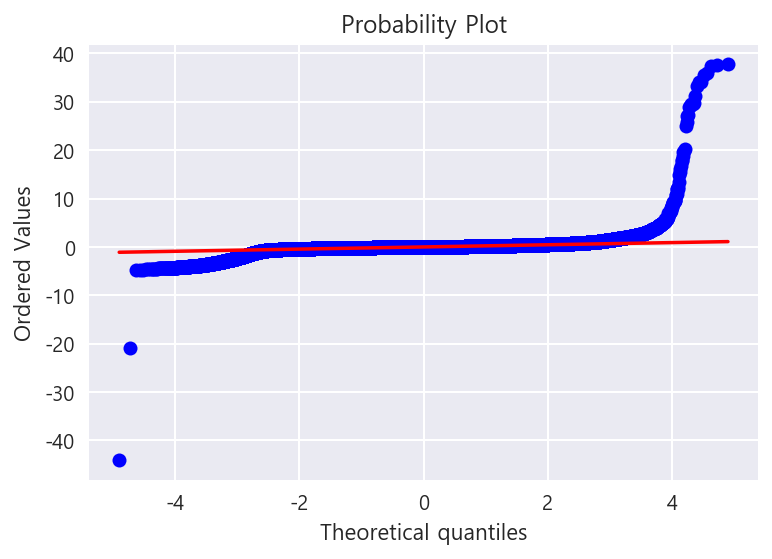

In [49]:
sp.stats.probplot(result23_dis_0_big_loc_dur_rm3_2.resid, plot=plt)
plt.show()

In [44]:
result23_dis_0_big_loc_dur_rm3_2_lasso = model23_dis_0_big_loc_dur_rm3_2.fit_regularized(alpha=0.001, L1_wt=1)
print(result23_dis_0_big_loc_dur_rm3_2_lasso.params)

C(working_day)[0]                4.813700
C(working_day)[1]                4.877494
scale(passenger_count)           0.003431
np.log1p(distance)               1.274797
scale(bearing)                   0.009201
scale(pickup_month)              0.010108
scale(pickup_weekday)            0.011993
scale(pickup_hour)               0.123225
scale(I(pickup_hour ** 2))      -0.121759
scale(pickup_latitude)           0.000000
scale(pickup_longitude)          0.000000
scale(dropoff_latitude)          0.000000
scale(avg_speed_km_h)           -0.655090
scale(I(avg_speed_km_h ** 2))    1.002200
scale(I(avg_speed_km_h ** 3))   -0.525493
dtype: float64


속도 다시 구하기

In [76]:
train_dis_0_big_loc_dur_rm2 = pd.DataFrame(train_dis_0_big_loc_dur_rm)

In [ ]:
train["avg_speed_km_h"] = train["distance"] / (train["trip_duration"] / 3600)
train["avg_speed_km_h"].tail()
taxi_speed = train.loc[:, ["pickup_hour", "avg_speed_km_h"]]
taxi_speed = taxi_speed.groupby("pickup_hour").mean()
taxi_speed.reset_index(level=0, inplace=True)
train_speed = pd.merge(train, taxi_speed, on = ["pickup_hour"])
train_speed.rename(columns = {"avg_speed_km_h_y": "avg_speed_km_h"}, inplace = True)
train_speed.drop(labels = ["avg_speed_km_h_x"], axis = 1, inplace = True)

In [69]:
train_dis_0_big_loc_dur_rm2.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_weekday,pickup_hour,working_day,distance,bearing,avg_speed_km_h
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,4,13,1,1.225080,240.940662,5.668751
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,1,6,7,0,6.049836,25.342196,33.251005
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,4,4,6,1,7.824606,209.211508,36.869870
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,1,1,15,1,1.092564,35.033294,10.544853
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198,4,1,14,1,1.134042,29.969486,20.618945


In [77]:
train_dis_0_big_loc_dur_rm2["avg_speed_km_h"] = train_dis_0_big_loc_dur_rm2["distance"] / (train_dis_0_big_loc_dur_rm2["trip_duration"] / 3600)
train_dis_0_big_loc_dur_rm2["avg_speed_km_h"].tail()
taxi_speed_dis_0_big_loc_dur_rm = train_dis_0_big_loc_dur_rm2.loc[:, ["pickup_hour", "avg_speed_km_h"]]
taxi_speed_dis_0_big_loc_dur_rm = taxi_speed_dis_0_big_loc_dur_rm.groupby("pickup_hour").mean()
taxi_speed_dis_0_big_loc_dur_rm.reset_index(level=0, inplace=True)
train_dis_0_big_loc_dur_rm2 = pd.merge(train_dis_0_big_loc_dur_rm2, taxi_speed_dis_0_big_loc_dur_rm, on = ["pickup_hour"])
train_dis_0_big_loc_dur_rm2.rename(columns = {"avg_speed_km_h_y": "avg_speed_km_h"}, inplace = True)
train_dis_0_big_loc_dur_rm2.drop(labels = ["avg_speed_km_h_x"], axis = 1, inplace = True)

In [71]:
train_speed_dis_0_big_loc_dur_rm2.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_weekday,pickup_hour,working_day,distance,bearing,avg_speed_km_h
1450840,id0150694,2,2016-05-28 04:37:41,2016-05-28 04:53:12,1,-73.984749,40.696651,-73.987717,40.759769,0,931,5,5,4,0,7.022853,357.960228,22.165394
1450841,id2444084,1,2016-05-01 04:48:55,2016-05-01 04:58:45,1,-73.978012,40.741982,-73.998810,40.714375,0,590,5,6,4,0,3.534787,209.728808,22.165394
1450842,id0238076,1,2016-05-24 04:41:25,2016-05-24 04:48:24,1,-73.997971,40.760773,-73.987144,40.755196,0,419,5,1,4,1,1.102749,124.215746,22.165394
1450843,id3423195,2,2016-04-09 04:29:43,2016-04-09 04:57:47,2,-73.985168,40.727493,-73.907326,40.683338,0,1684,4,5,4,0,8.195229,126.780635,22.165394
1450844,id2085200,1,2016-03-25 04:12:04,2016-03-25 04:41:55,1,-73.995178,40.749668,-73.960800,40.688099,0,1791,3,4,4,1,7.434004,157.050940,22.165394


In [74]:
train_dis_0_big_loc_dur_rm.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_weekday,pickup_hour,working_day,distance,bearing,avg_speed_km_h
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,4,13,1,1.225080,240.940662,5.668751
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,1,6,7,0,6.049836,25.342196,33.251005
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,4,4,6,1,7.824606,209.211508,36.869870
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,1,1,15,1,1.092564,35.033294,10.544853
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198,4,1,14,1,1.134042,29.969486,20.618945


In [72]:
model23_dis_0_big_loc_dur_rm3_2_new = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log1p(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_speed_dis_0_big_loc_dur_rm2)
result23_dis_0_big_loc_dur_rm3_2_new = model23_dis_0_big_loc_dur_rm3_2_new.fit()
print(result23_dis_0_big_loc_dur_rm3_2_new.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.662
Model:                                 OLS   Adj. R-squared:                  0.662
Method:                      Least Squares   F-statistic:                 2.031e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             17:26:12   Log-Likelihood:            -8.8299e+05
No. Observations:                  1450845   AIC:                         1.766e+06
Df Residuals:                      1450830   BIC:                         1.766e+06
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [78]:
model23_dis_0_big_loc_dur_rm3_2_new2 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log1p(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_dis_0_big_loc_dur_rm2)
result23_dis_0_big_loc_dur_rm3_2_new2 = model23_dis_0_big_loc_dur_rm3_2_new2.fit()
print(result23_dis_0_big_loc_dur_rm3_2_new2.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.662
Model:                                 OLS   Adj. R-squared:                  0.662
Method:                      Least Squares   F-statistic:                 2.031e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             17:33:51   Log-Likelihood:            -8.8299e+05
No. Observations:                  1450845   AIC:                         1.766e+06
Df Residuals:                      1450830   BIC:                         1.766e+06
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [78]:
model23_dis_0_big_loc_dur_rm3_2_new2 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log1p(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_dis_0_big_loc_dur_rm2)
result23_dis_0_big_loc_dur_rm3_2_new2 = model23_dis_0_big_loc_dur_rm3_2_new2.fit()
print(result23_dis_0_big_loc_dur_rm3_2_new2.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.662
Model:                                 OLS   Adj. R-squared:                  0.662
Method:                      Least Squares   F-statistic:                 2.031e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             17:33:51   Log-Likelihood:            -8.8299e+05
No. Observations:                  1450845   AIC:                         1.766e+06
Df Residuals:                      1450830   BIC:                         1.766e+06
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [79]:
result23_dis_0_big_loc_dur_rm3_2_new2_lasso = model23_dis_0_big_loc_dur_rm3_2_new2.fit_regularized(alpha=0.001, L1_wt=1)
print(result23_dis_0_big_loc_dur_rm3_2_new2_lasso.params)

C(working_day)[0]                5.114988
C(working_day)[1]                5.282858
scale(passenger_count)           0.006795
np.log1p(distance)               0.975521
scale(bearing)                   0.000000
scale(pickup_month)              0.025337
scale(pickup_weekday)            0.034866
scale(pickup_hour)               0.000000
scale(I(pickup_hour ** 2))      -0.004339
scale(pickup_latitude)           0.000000
scale(pickup_longitude)          0.000000
scale(dropoff_latitude)         -0.038328
scale(avg_speed_km_h)           -0.143751
scale(I(avg_speed_km_h ** 2))    0.000000
scale(I(avg_speed_km_h ** 3))    0.000600
dtype: float64


In [80]:
result23_dis_0_big_loc_dur_rm3_2_new2_lasso2 = model23_dis_0_big_loc_dur_rm3_2_new2.fit_regularized(alpha=0.0009, L1_wt=1)
print(result23_dis_0_big_loc_dur_rm3_2_new2_lasso2.params)

C(working_day)[0]                5.115764
C(working_day)[1]                5.283569
scale(passenger_count)           0.006899
np.log1p(distance)               0.975101
scale(bearing)                   0.000000
scale(pickup_month)              0.025448
scale(pickup_weekday)            0.034960
scale(pickup_hour)               0.000000
scale(I(pickup_hour ** 2))      -0.004054
scale(pickup_latitude)           0.000000
scale(pickup_longitude)          0.000000
scale(dropoff_latitude)         -0.038475
scale(avg_speed_km_h)           -0.147943
scale(I(avg_speed_km_h ** 2))    0.000000
scale(I(avg_speed_km_h ** 3))    0.004858
dtype: float64


In [81]:
model23_dis_0_big_loc_dur_rm3_2_new3 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log1p(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(I(pickup_hour**2)) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_dis_0_big_loc_dur_rm2)
result23_dis_0_big_loc_dur_rm3_2_new3 = model23_dis_0_big_loc_dur_rm3_2_new3.fit()
print(result23_dis_0_big_loc_dur_rm3_2_new3.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.662
Model:                                 OLS   Adj. R-squared:                  0.662
Method:                      Least Squares   F-statistic:                 2.365e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             17:43:47   Log-Likelihood:            -8.8379e+05
No. Observations:                  1450845   AIC:                         1.768e+06
Df Residuals:                      1450832   BIC:                         1.768e+06
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [82]:
model23_dis_0_big_loc_dur_rm3_2_new4 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log1p(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(I(pickup_hour**2)) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**3)) - 1", train_dis_0_big_loc_dur_rm2)
result23_dis_0_big_loc_dur_rm3_2_new4 = model23_dis_0_big_loc_dur_rm3_2_new4.fit()
print(result23_dis_0_big_loc_dur_rm3_2_new4.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.662
Model:                                 OLS   Adj. R-squared:                  0.662
Method:                      Least Squares   F-statistic:                 2.579e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             17:47:16   Log-Likelihood:            -8.8398e+05
No. Observations:                  1450845   AIC:                         1.768e+06
Df Residuals:                      1450833   BIC:                         1.768e+06
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

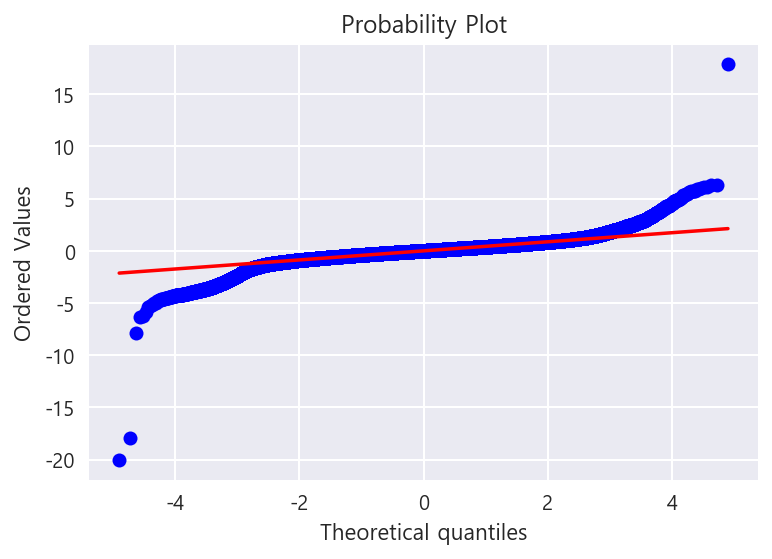

In [84]:
sp.stats.probplot(result23_dis_0_big_loc_dur_rm3_2_new4.resid, plot=plt)
plt.show()

In [46]:
# 레버리지 구하기
influence = result23_dis_0_big_loc_dur_rm3_2.get_influence()
hat = influence.hat_matrix_diag
# 레버리지의 평균 구하기(n = 1458644, n은 데이터의 개수)
hat_mean = hat.sum() / 1458644
# 표준화 잔차 구하기
rs_p = result23_dis_0_big_loc_dur_rm3_2.resid_pearson
# 레버리지와 표준화 잔차로 이루어진 data frame 만들기(index는 train data의 index와 동일)
d = {"hat" : hat, "rs_p" : rs_p}
hat_rs_p_df = pd.DataFrame(data = d, index = train_dis_0_big_loc_dur_rm.index.values)
# 레버리지와 표준화 잔차가 각각 일정수준 이상으로 큰 value들은 True로 나오는 data frame 만들기(index는 train data의 index와 동일)
d_3h3r = {"hat" : hat > (3 * hat_mean), "rs_p" : rs_p > 3}
hat_rs_p_out_3h3r_df = pd.DataFrame(data = d_3h3r, index = train_dis_0_big_loc_dur_rm.index.values)
# 아웃라이어 data(레버리지와 표준화 잔차 둘 다 큰것. 따라서 any를 씀)의 표준화 잔차와 레버리지(index는 재정렬되지 않은 상태)
outlier_3h3r = hat_rs_p_df[hat_rs_p_out_3h3r_df]
outlier_3h3r.dropna(how = "any", inplace = True)
# outlier의 index 뽑기
outlier_3h3r_index = outlier_3h3r.index
# 뽑은 index로 train data에서 outlier 제거하기
train_out_rm_3h3r_result23_dis_0_big_loc_dur_rm3_2 = train.drop(labels = outlier_3h3r_index)
train_out_rm_3h3r_result23_dis_0_big_loc_dur_rm3_2.reset_index(drop=True, inplace=True)
# 몇개의 outlier들이 제거되었는지 print하기
print("{} outliers are omitted from the data.".format(len(outlier_3h3r_index)))

599 outliers are omitted from the data.


3-23_dis_0_big_loc_dur_rm에서 pickup_longitude의 2차 다항회귀 제거 & scale(dropoff_longitude) 제거 & np.log(distance)에서 np.log1p(distance)로 변경

- a : 위의 model에서 data를 3h3r data로 변경

In [48]:
model23_dis_0_big_loc_dur_rm3_2_3h3r = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log1p(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_3h3r_result23_dis_0_big_loc_dur_rm3_2)
result23_dis_0_big_loc_dur_rm3_2_3h3r = model23_dis_0_big_loc_dur_rm3_2_3h3r.fit()
print(result23_dis_0_big_loc_dur_rm3_2_3h3r.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.849
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                 5.840e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             16:18:57   Log-Likelihood:            -3.5616e+05
No. Observations:                  1458045   AIC:                         7.123e+05
Df Residuals:                      1458030   BIC:                         7.125e+05
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

속도 다시 구하기

In [ ]:
train_out_rm_3h3r_result23_dis_0_big_loc_dur_rm3_2

In [ ]:
train["avg_speed_km_h"] = train["distance"] / (train["trip_duration"] / 3600)
train["avg_speed_km_h"].tail()
taxi_speed = train.loc[:, ["pickup_hour", "avg_speed_km_h"]]
taxi_speed = taxi_speed.groupby("pickup_hour").mean()
taxi_speed.reset_index(level=0, inplace=True)
train_speed = pd.merge(train, taxi_speed, on = ["pickup_hour"])
train_speed.rename(columns = {"avg_speed_km_h_y": "avg_speed_km_h"}, inplace = True)
train_speed.drop(labels = ["avg_speed_km_h_x"], axis = 1, inplace = True)

In [ ]:
2943570.952

    - Lasso

In [50]:
result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso = model23_dis_0_big_loc_dur_rm3_2_3h3r.fit_regularized(alpha=0.0005, L1_wt=1)
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso.params)

C(working_day)[0]                4.700106
C(working_day)[1]                4.725844
scale(passenger_count)           0.005379
np.log1p(distance)               1.393672
scale(bearing)                   0.000000
scale(pickup_month)              0.004491
scale(pickup_weekday)            0.004180
scale(pickup_hour)               0.038159
scale(I(pickup_hour ** 2))      -0.044160
scale(pickup_latitude)           0.000000
scale(pickup_longitude)          0.000000
scale(dropoff_latitude)          0.000000
scale(avg_speed_km_h)           -0.734379
scale(I(avg_speed_km_h ** 2))    0.739318
scale(I(avg_speed_km_h ** 3))   -0.216581
dtype: float64


In [51]:
result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso2 = model23_dis_0_big_loc_dur_rm3_2_3h3r.fit_regularized(alpha=0.0001, L1_wt=1)
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso2.params)

C(working_day)[0]                4.693388
C(working_day)[1]                4.718785
scale(passenger_count)           0.005822
np.log1p(distance)               1.399937
scale(bearing)                   0.005525
scale(pickup_month)              0.005026
scale(pickup_weekday)            0.004592
scale(pickup_hour)               0.051406
scale(I(pickup_hour ** 2))      -0.057155
scale(pickup_latitude)          -0.000300
scale(pickup_longitude)         -0.021154
scale(dropoff_latitude)          0.009352
scale(avg_speed_km_h)           -0.732428
scale(I(avg_speed_km_h ** 2))    0.767677
scale(I(avg_speed_km_h ** 3))   -0.245451
dtype: float64


In [53]:
result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso3 = model23_dis_0_big_loc_dur_rm3_2_3h3r.fit_regularized(alpha=0.0003, L1_wt=1)
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso3.params)

C(working_day)[0]                4.701585
C(working_day)[1]                4.727008
scale(passenger_count)           0.005587
np.log1p(distance)               1.393001
scale(bearing)                   0.000000
scale(pickup_month)              0.004721
scale(pickup_weekday)            0.004441
scale(pickup_hour)               0.043852
scale(I(pickup_hour ** 2))      -0.049822
scale(pickup_latitude)           0.000000
scale(pickup_longitude)          0.000000
scale(dropoff_latitude)          0.000000
scale(avg_speed_km_h)           -0.734363
scale(I(avg_speed_km_h ** 2))    0.753663
scale(I(avg_speed_km_h ** 3))   -0.231038
dtype: float64


In [56]:
result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso4 = model23_dis_0_big_loc_dur_rm3_2_3h3r.fit_regularized(alpha=0.0002, L1_wt=1)
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso4.params)

C(working_day)[0]                4.692644
C(working_day)[1]                4.718186
scale(passenger_count)           0.005719
np.log1p(distance)               1.400283
scale(bearing)                   0.005399
scale(pickup_month)              0.004910
scale(pickup_weekday)            0.004461
scale(pickup_hour)               0.048511
scale(I(pickup_hour ** 2))      -0.054274
scale(pickup_latitude)           0.000000
scale(pickup_longitude)         -0.021020
scale(dropoff_latitude)          0.009158
scale(avg_speed_km_h)           -0.732436
scale(I(avg_speed_km_h ** 2))    0.760361
scale(I(avg_speed_km_h ** 3))   -0.238121
dtype: float64


In [58]:
result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso5 = model23_dis_0_big_loc_dur_rm3_2_3h3r.fit_regularized(alpha=0.00025, L1_wt=1)
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso5.params)

C(working_day)[0]                4.701956
C(working_day)[1]                4.727299
scale(passenger_count)           0.005639
np.log1p(distance)               1.392833
scale(bearing)                   0.000000
scale(pickup_month)              0.004779
scale(pickup_weekday)            0.004506
scale(pickup_hour)               0.045276
scale(I(pickup_hour ** 2))      -0.051238
scale(pickup_latitude)           0.000000
scale(pickup_longitude)          0.000000
scale(dropoff_latitude)          0.000000
scale(avg_speed_km_h)           -0.734359
scale(I(avg_speed_km_h ** 2))    0.757249
scale(I(avg_speed_km_h ** 3))   -0.234652
dtype: float64


In [59]:
result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso6 = model23_dis_0_big_loc_dur_rm3_2_3h3r.fit_regularized(alpha=0.00023, L1_wt=1)
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_lasso6.params)

C(working_day)[0]                4.692427
C(working_day)[1]                4.718016
scale(passenger_count)           0.005687
np.log1p(distance)               1.400379
scale(bearing)                   0.005373
scale(pickup_month)              0.004875
scale(pickup_weekday)            0.004422
scale(pickup_hour)               0.047646
scale(I(pickup_hour ** 2))      -0.053414
scale(pickup_latitude)           0.000000
scale(pickup_longitude)         -0.020984
scale(dropoff_latitude)          0.009147
scale(avg_speed_km_h)           -0.732446
scale(I(avg_speed_km_h ** 2))    0.758183
scale(I(avg_speed_km_h ** 3))   -0.235921
dtype: float64


- b : a에서 scale(pickup_latitude) 제거

In [54]:
model23_dis_0_big_loc_dur_rm3_2_3h3r_2 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log1p(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_3h3r_result23_dis_0_big_loc_dur_rm3_2)
result23_dis_0_big_loc_dur_rm3_2_3h3r_2 = model23_dis_0_big_loc_dur_rm3_2_3h3r_2.fit()
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_2.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.849
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                 6.289e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             16:35:30   Log-Likelihood:            -3.5616e+05
No. Observations:                  1458045   AIC:                         7.123e+05
Df Residuals:                      1458031   BIC:                         7.125e+05
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

- c : b에서 scale(bearing) 제거

In [55]:
model23_dis_0_big_loc_dur_rm3_2_3h3r_3 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log1p(distance) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_3h3r_result23_dis_0_big_loc_dur_rm3_2)
result23_dis_0_big_loc_dur_rm3_2_3h3r_3 = model23_dis_0_big_loc_dur_rm3_2_3h3r_3.fit()
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_3.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.849
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                 6.812e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             16:41:53   Log-Likelihood:            -3.5627e+05
No. Observations:                  1458045   AIC:                         7.126e+05
Df Residuals:                      1458032   BIC:                         7.127e+05
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

- d : c에서 avg_speed_km_h 4차항 추가

In [60]:
model23_dis_0_big_loc_dur_rm3_2_3h3r_4 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log1p(distance) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) + scale(I(avg_speed_km_h**4)) - 1", train_out_rm_3h3r_result23_dis_0_big_loc_dur_rm3_2)
result23_dis_0_big_loc_dur_rm3_2_3h3r_4 = model23_dis_0_big_loc_dur_rm3_2_3h3r_4.fit()
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_4.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.853
Model:                                 OLS   Adj. R-squared:                  0.853
Method:                      Least Squares   F-statistic:                 6.526e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             17:03:09   Log-Likelihood:            -3.3320e+05
No. Observations:                  1458045   AIC:                         6.664e+05
Df Residuals:                      1458031   BIC:                         6.666e+05
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

- e : b에서 C(working_day), scale(pickup_month), scale(pickup_weekday) 제거(따라서 상수항 제거 안하고 추가)

In [62]:
model23_dis_0_big_loc_dur_rm3_2_3h3r_5 = sm.OLS.from_formula("np.log1p(trip_duration) ~  scale(passenger_count) + np.log1p(distance) + scale(bearing) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3))", train_out_rm_3h3r_result23_dis_0_big_loc_dur_rm3_2)
result23_dis_0_big_loc_dur_rm3_2_3h3r_5 = model23_dis_0_big_loc_dur_rm3_2_3h3r_5.fit()
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_5.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.849
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                 8.170e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             17:07:59   Log-Likelihood:            -3.5662e+05
No. Observations:                  1458045   AIC:                         7.133e+05
Df Residuals:                      1458034   BIC:                         7.134e+05
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [ ]:
sp.stats.probplot(result23_dis_0_big_loc_dur_rm3_2_3h3r_5.resid, plot=plt)
plt.show()

- f : b에서 np.log1p(distance)을 scaling함

In [63]:
model23_dis_0_big_loc_dur_rm3_2_3h3r_6 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + scale(np.log1p(distance)) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_longitude) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_out_rm_3h3r_result23_dis_0_big_loc_dur_rm3_2)
result23_dis_0_big_loc_dur_rm3_2_3h3r_6 = model23_dis_0_big_loc_dur_rm3_2_3h3r_6.fit()
print(result23_dis_0_big_loc_dur_rm3_2_3h3r_6.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.849
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                 6.289e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             17:13:37   Log-Likelihood:            -3.5616e+05
No. Observations:                  1458045   AIC:                         7.123e+05
Df Residuals:                      1458031   BIC:                         7.125e+05
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [40]:
model23_dis_0_big_loc_dur_rm4 = sm.OLS.from_formula("np.log1p(trip_duration) ~  C(working_day) + scale(passenger_count) + np.log(distance) + scale(bearing) + scale(pickup_month) + scale(pickup_weekday) + scale(pickup_hour) + scale(I(pickup_hour**2)) + scale(pickup_latitude) + scale(pickup_longitude) + scale(I(pickup_longitude ** 2)) + scale(dropoff_latitude) + scale(avg_speed_km_h) + scale(I(avg_speed_km_h**2)) + scale(I(avg_speed_km_h**3)) - 1", train_dis_0_big_loc_dur_rm)
result23_dis_0_big_loc_dur_rm4 = model23_dis_0_big_loc_dur_rm4.fit()
print(result23_dis_0_big_loc_dur_rm4.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log1p(trip_duration)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.854
Method:                      Least Squares   F-statistic:                 5.671e+05
Date:                     Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                             15:41:09   Log-Likelihood:            -2.7278e+05
No. Observations:                  1450845   AIC:                         5.456e+05
Df Residuals:                      1450829   BIC:                         5.458e+05
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [ ]:
# 레버리지 구하기
influence21 = result21.get_influence()
hat21 = influence21.hat_matrix_diag
# 레버리지의 평균 구하기(n = 1458644, n은 데이터의 개수)
hat21_mean = hat21.sum() / 1458644
# 표준화 잔차 구하기
rs_p21 = result21.resid_pearson
# 레버리지와 표준화 잔차로 이루어진 data frame 만들기(index는 train data의 index와 동일)
d21 = {"hat21" : hat21, "rs_p21" : rs_p21}
hat_rs_p_21_df = pd.DataFrame(data = d21, index = train.index.values)
# 레버리지와 표준화 잔차가 각각 일정수준 이상으로 큰 value들은 True로 나오는 data frame 만들기(index는 train data의 index와 동일)
d21_3h3r = {"hat21" : hat21 > (3 * hat21_mean), "rs_p21" : rs_p21 > 3}
hat_rs_p_out_3h3r_21_df = pd.DataFrame(data = d21_3h3r, index = train.index.values)
# 아웃라이어 data(레버리지와 표준화 잔차 둘 다 큰것. 따라서 any를 씀)의 표준화 잔차와 레버리지(index는 재정렬되지 않은 상태)
outlier21_3h3r = hat_rs_p_21_df[hat_rs_p_out_3h3r_21_df]
outlier21_3h3r.dropna(how = "any", inplace = True)
# outlier의 index 뽑기
outlier21_3h3r_index = outlier21_3h3r.index
# 뽑은 index로 train data에서 outlier 제거하기
train_out_rm_21_3h3r = train.drop(labels = outlier21_3h3r_index)
train_out_rm_21_3h3r.reset_index(drop=True, inplace=True)
# 몇개의 outlier들이 제거되었는지 print하기
print("{} outliers are omitted from the data.".format(len(outlier21_3h3r_index)))

----------------------

In [83]:
z_test = result23_dis_0_big_loc_dur_rm3_2_new4.predict(test)
len(z_test)
y_test = np.exp(z_test) - 1
len(y_test)
submission = pd.DataFrame({"id": test.id, "trip_duration": y_test})
submission.to_csv("submission23_dis_0_big_loc_dur_rm3_2_new4.csv", index = False)

------------------------
